In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# set path

In [3]:
path = r'C:\Users\Andrew\Desktop\Data Immersion 1\Instacart Basket Analysis'

In [4]:
ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_merged.pkl'))

In [5]:
ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending,frequency
0,2539329,1,1,2,8,7.0,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,Low spender,regular customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,Low spender,regular customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,Low spender,regular customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,Low spender,regular customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders,10,New customer,Low spender,regular customer


<Axes: >

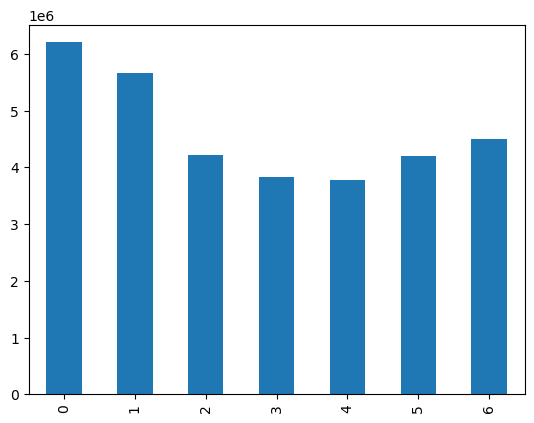

In [6]:
ords_prods_merged['order_day_of_the_week'].value_counts().sort_index().plot.bar()

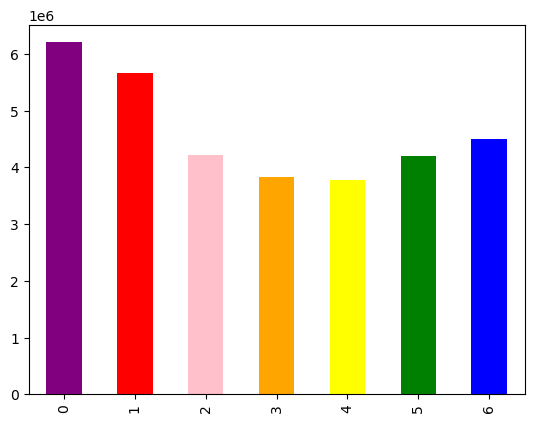

In [7]:
bar = ords_prods_merged['order_day_of_the_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [8]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [9]:
# Histograms

<Axes: ylabel='Frequency'>

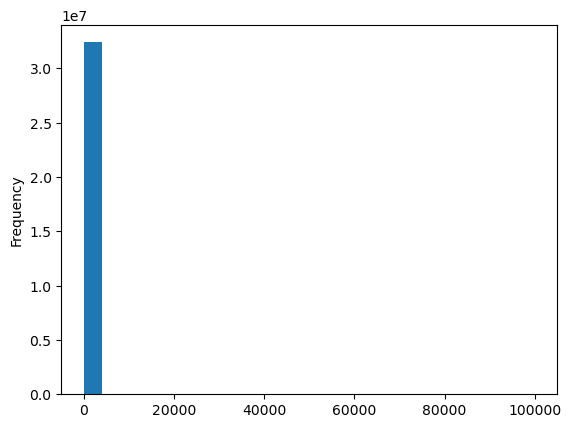

In [10]:
ords_prods_merged['prices'].plot.hist(bins = 25)

In [11]:
# Scatterplot

<Axes: xlabel='prices', ylabel='prices'>

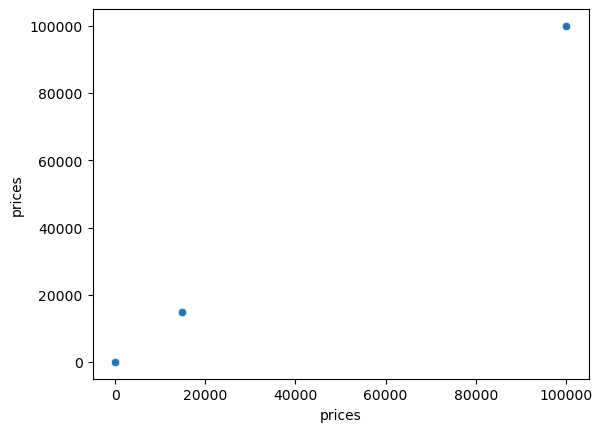

In [12]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merged)

In [15]:
ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

,order_id,user_id,order_number,order_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_period_of_day,max_order,loyalty_flag,spending,frequency
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Average orders,40,Regular customer,High spender,frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Average orders,40,Regular customer,High spender,frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Regularly busy,Average orders,4,New customer,High spender,regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest day,Average orders,4,New customer,High spender,regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,High-range product,Busiest day,Average orders,16,Regular customer,High spender,regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Busiest day,Average orders,39,Regular customer,High spender,frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Busiest day,Average orders,39,Regular customer,High spender,frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Average orders,15,Regular customer,High spender,frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,84,16,99999.0,High-range product,Least busy,Average orders,12,Regular customer,High spender,frequent customer


In [17]:
ords_prods_merged.loc[ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [19]:
ords_prods_merged['prices'].max()

25.0

<Axes: ylabel='Frequency'>

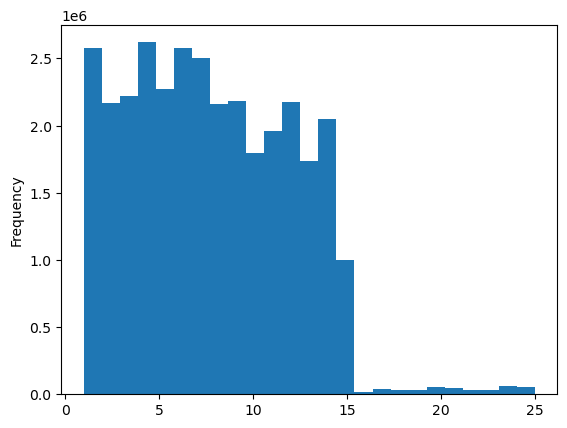

In [20]:
ords_prods_merged['prices'].plot.hist(bins = 25)

In [22]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [23]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
big = ords_prods_merged[dev]
small = ords_prods_merged[~dev]

In [26]:
#Check size

In [28]:
len(ords_prods_merged)

32404859

In [29]:
len(big) + len(small)

32404859

In [30]:
# Getting just tne necessary columns

In [32]:
df_2 = small[['order_day_of_the_week','prices']]

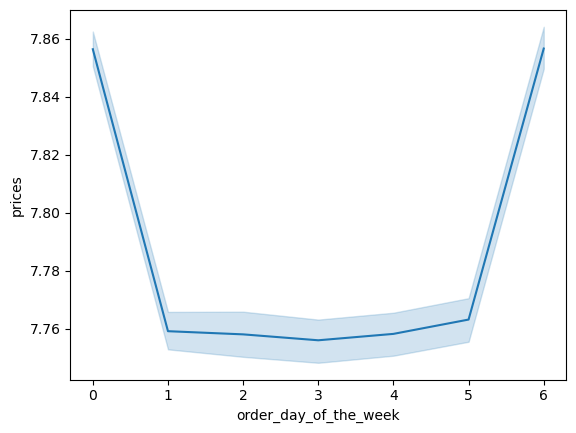

In [34]:
line = sns.lineplot(data = df_2, x = 'order_day_of_the_week',y = 'prices')